# Kerasによるニューラルネット実装例(MNIST)

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import h5py

Using TensorFlow backend.


In [65]:
# 自分で設定するパラメータ
batch_size = 128
epochs = 10

In [66]:
# データ抽出
(x_train, y_train), (x_test, y_test) = mnist.load_data()
num_classes = 10
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# one-hot-label に変換
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


In [67]:
# モデルの構築
model = Sequential()

# 最初の隠れ層(入力784 -> 出力512)
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))

# 隠れ層(入力512 -> 出力512)
## 隠れ層は追加可能
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

# 出力層(入力512 -> 出力10)
model.add(Dense(10, activation='softmax'))

# モデル概要表示
model.summary()

# モデルのコンパイル
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

# フィッティング(学習)
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

# スコアの計算・表示
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s - loss: 0.2458 - acc: 0.

In [5]:
import h5py
print(h5py)
# 学習モデルの保存
model.save("trained_data.h5")

<module 'h5py' from '/Users/kazuki/.pyenv/versions/3.6.1/lib/python3.6/site-packages/h5py/__init__.py'>


# モデルのテスト

In [57]:
# 画像の読み込み
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

#Jupyterでインライン表示するための宣言
%matplotlib inline 

#画像の読み込み
im = Image.open("./tegaki7-2.jpg")

In [58]:
gray_img = im.convert('L')
gray_img = gray_img.resize((28,28))
#画像をarrayに変換
im_list = np.array(gray_img, 'f')

### 入力画像によって変更

In [59]:
##白地に黒文字の場合は実行
##白黒反転をし，正規化
im_list = 1 - im_list/255.

##黒地に白文字の場合は実行
##正規化
# im_list = im_list/255.

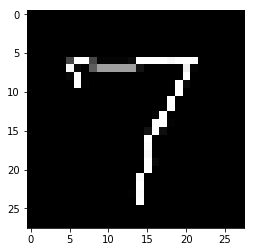

In [60]:
#入力画像の表示
plt.imshow(im_list,cmap=plt.get_cmap('gray'))

In [63]:
# 画像判別
test = im_list.reshape(1,784)
print(model.predict(test))
print('\n')
print('Result:',np.argmax(model.predict(test)[0]))

[[  8.18891684e-04   2.97303940e-03   7.37489089e-02   2.03929767e-01
    9.53423791e-04   1.32523000e-03   4.42908859e-05   6.97649956e-01
    7.93705415e-03   1.06194271e-02]]


Result: 7
